# House Price Prediction in Iowa Region

Lets import the libraries needed and the data.

In [1]:
# Importing Lib's
import numpy as np
import pandas as pd

# Scalar & Pipelines
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

# Models
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor as xgb
from lightgbm import LGBMRegressor as lgb

# Metrics
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import skew, norm
from sklearn.metrics import mean_squared_error, make_scorer

# Viz Lib
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Parameters
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Limit Float output to 3 decimal points
pd.set_option('max_columns', 10)
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
# Importing Data
train = pd.read_csv('Data/Iowa_House_Prices/train.csv')
test = pd.read_csv('Data/Iowa_House_Prices/test.csv')
print(f'Train Data Shape:{train.shape},\n Test Data Shape: {test.shape}')

# Checking Column's and Id
train.head()

Train Data Shape:(1460, 81),
 Test Data Shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,...,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,...,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,...,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,...,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,...,12,2008,WD,Normal,250000


# Data Description

- SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [3]:
# Check duplicate ID's
unique_ids = len(set(train.Id))
total_ids = train.shape[0]
dupes = unique_ids - total_ids
print(f'The number of duplicates are {str(dupes)} for {str(total_ids)} total entries')

The number of duplicates are 0 for 1460 total entries


In [4]:
# Save Id's column
train_Id = train.Id
test_Id = test.Id

# Drop Id's column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
print(f'Train Data Shape:{train.shape},\n Test Data Shape: {test.shape} after dropping Id column')

Train Data Shape:(1460, 80),
 Test Data Shape: (1459, 79) after dropping Id column


## 1. Preprocessing
### 1.1 Outliers
First, let's deal with outliers as mentioned in the [documentation]{https://ww2.amstat.org/publications/jse/v19n3/decock.pdf}. There seems to be 2 extreme outliers where very large houses sold for very cheap. The author recommends to delete these observations and gneerally any house beyond 4k sq ft from the dataset.

Text(0.5,1,'Outliers')

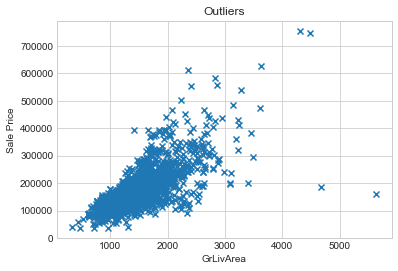

In [5]:
# Outliers
plt.scatter(train.GrLivArea, train.SalePrice, marker='x')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Outliers')

Text(0.5,1,'Outliers')

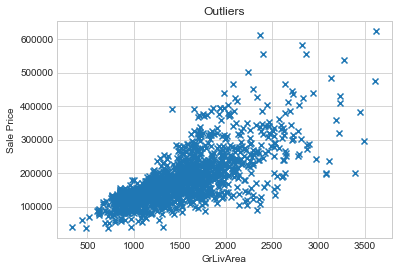

In [6]:
# Drop observations above 4k sq ft in GrLivArea
train = train[train.GrLivArea < 4000]

# Plotting 
plt.scatter(train.GrLivArea, train.SalePrice, marker='x')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Outliers')

### 1.2 Target Variable (`SalePrice`)
Lets look at our target variable and check if there is some skewness in it.

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000], dtype=int64)),
 (72529.25745327886, 180151.23351648354, 0.9441000819950992))

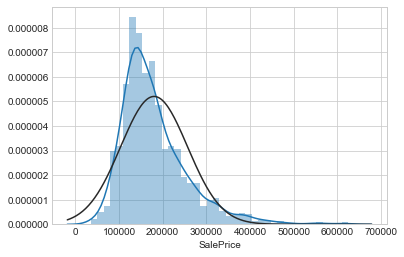

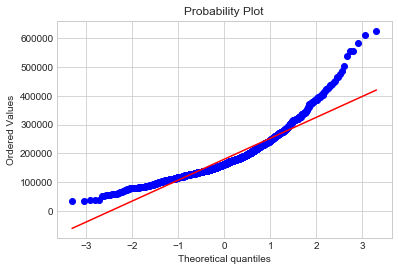

In [7]:
sns.distplot(train.SalePrice, fit=norm)
plt.figure()
stats.probplot(train.SalePrice, plot=plt)

Target Variable seems right skewed, it would be better to do a log-transformation so that the errors in predicting expensive houses and cheap houses will affect the result equally.

In [8]:
# Get Normal Distribution Parameters
mu, sigma = norm.fit(train.SalePrice)
print(f'mu: {mu:.3f} and sigma: {sigma:.3f} values before log transformation')

# Log Transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

mu: 180151.234 and sigma: 76670.250 values before log transformation


mu: 12.022 and sigma: 0.396 values after log transformation


((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.27582925,
         13.32392858, 13.34550853])),
 (0.39513801011722804, 12.021949506725813, 0.9959780917807469))

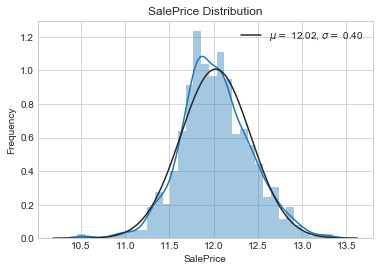

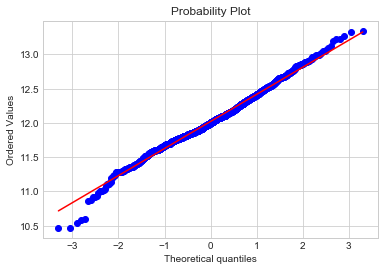

In [9]:
# Parameters after Transformation
mu, sigma = norm.fit(train.SalePrice)
print(f'mu: {mu:.3f} and sigma: {sigma:.3f} values after log transformation')

# Plot
sns.distplot(train.SalePrice, fit=norm)
plt.legend([f'$\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f}'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.figure()
stats.probplot(train.SalePrice, plot=plt)

Now, it's normally distributed and would be easier for linear models to work with it.

## 2. Feature Engineering
To make our lives sane combine both train and test sets for the feature engineering part so that w/e we do its reflected on both sets without us repeating the steps on both datasets.

In [10]:
# Train + Test
df = pd.concat(objs=[train, test]).reset_index(drop=True)

# Target Variable Isolation
y_train = train.SalePrice.values

# Drop target from data for now
df.drop(['SalePrice'], axis=1, inplace=True)

# Total Data Shape
df.shape

(2915, 79)

### 2.1 Missing Data
Deal with missing data as per the data description. Get the percentage of missing data from each feature to get a more clear picture.


In [11]:
# Missing data Statistics
miss_count = df.isnull().sum().sort_values(ascending=False)
miss_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([miss_count, miss_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2907,99.726
MiscFeature,2810,96.398
Alley,2717,93.208
Fence,2345,80.446
FireplaceQu,1420,48.714
LotFrontage,486,16.672
GarageFinish,159,5.455
GarageQual,159,5.455
GarageYrBlt,159,5.455
GarageCond,159,5.455


Impute the data missing with each feature checking in with the description.

- Alley: Data description says NA means "no alley access"

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Missing values mostly means have no basement

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2: These are categorical Basement values so we will deal with them a later time and there is no basement with `NaN` value. So, for now just replace with `None`

- Electrical: One missing value so just replace with common observation

- Exterior1st and Exterior2nd: Both have 1 and 2 missing values sub with common value

- Functional: Description says `NA` means typical

- Fence: Data description says NA means "no fence"

- FireplaceQu: Data description says NA means "no fireplace"

- GarageType, GarageFinish, GarageQual and GarageCond: Missing mostly means not present, so replace with `None`

- GarageYrBlt, GarageArea and GarageCars:
Replace missing values with `0` since no garage = no cars

- KitchenQual: One missing value replace with common record

- LotFrontage: `NA` most likely means no lot frontage

- MSZoning: Fill with most common value, as this pertains to zoning classification

- MSSubClass: `NA` most likely means no building class, replace missing values with `None`

- MasVnrArea and MasVnrType: NA most likely means no Masonry veneer, So fill with `0` for area and `None` for type

- MiscFeature: Data description says NA means "no misc feature"

- SaleType: Same as above, replace with common value

- PoolQC: Data description says NA means "No Pool". So, majority(99%+) of the missing values mean just that most houses didn't have pools to begin with which is a common thing.

- Utilities: NA most likely means `AllPub` like the other records, if all records are `AllPub` it wont be helping much in predicting so we can remove this feature all together.

In [12]:
# Alley
df['Alley'] = df['Alley'].fillna('None')

# Basement Features
# Numerical
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col] = df[col].fillna(0)
# Categorical
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

# Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Exterior Features
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

# Functional
df['Functional'] = df['Functional'].fillna('Typ')

# Fence
df['Fence'] = df['Fence'].fillna('None')

# Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# Garage Features
# Numerical
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)
# Categorical
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

# KitchenQuality
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

# LotFrontage
df['LotFrontage'] = df['LotFrontage'].fillna(0)

# MSZoning
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# MSSubclass
df['MSSubClass'] = df['MSSubClass'].fillna('None')

# MasVnr Features
# Numerical
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
# Categorical
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# MiscFeatures
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# SaleType
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')

# Utilities
df.drop(['Utilities'], axis=1, inplace=True)

In [13]:
# Check for missing values now
miss_count = df.isnull().sum().sort_values(ascending=False)
miss_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([miss_count, miss_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
YrSold,0,0.000
Foundation,0,0.000
ExterCond,0,0.000
ExterQual,0,0.000
Exterior1st,0,0.000


### 2.2 Formating
as we were trying to fill the missing values we noticed lot of categorical features which are wrongly indentified as numerical. So, lets deal with them now.


In [14]:
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['MSSubClass'] = df['MSSubClass'].astype(str)

### 2.3 Numerical Values
We can deal with numerical values which explode the preictions and model with overfitting it by transforming them using `Box-Cox` or `Log1p` to normalize them.

In [15]:
# Extracting Numerical Features
numerical_features = df.dtypes[df.dtypes != 'object'].index
numerical_features

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [16]:
# Check how skewed the data is for these features
skewed_features = df[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Convert to Data Frame for convenience
skewed_df = pd.DataFrame({'Skew': skewed_features})

In [17]:
# Get most skewed data
skewed_df = skewed_df[abs(skewed_df) > 0.75]
print(f'There are {(skewed_df.shape[0])} skewed numerical features which needs to be transformed')

# Box-Cox Transform the skewed features
for f in skewed_df.index:
    df[f] = boxcox1p(df[f], 0.15)

There are 32 skewed numerical features which needs to be transformed


### 2.4 Categorical Values
When it comes to categorical values the equivalent of normalization to smooth the predcition process is `Label Encoding`. Then get dummies for the remaining categorical values.

In [18]:
# Label Encoding
lbe = LabelEncoder()

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 
        'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 
        'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 
        'MoSold']

for i in cols:
    lbe.fit_transform(df[i].values)
        
# Get dummy values
df = pd.get_dummies(df)
df.shape

(2915, 337)

## 3. Modelling
Let's get on with modelling part, divide back our data set to train and test like before first though. Then start with some basic models and see how well these model do and try to improve on that.

Evaluation use `RMSE` and cross validate models using `KFold`.

In [19]:
# Getting train and test sets back after Feature engineering
train_1 = df[:len(train)]
test_1 = df[len(train):]
print(f'Shape of Train Set: {train_1.shape}\n Shape of Test Set: {test_1.shape}')

Shape of Train Set: (1456, 337)
 Shape of Test Set: (1459, 337)


In [20]:
# Cross Val with KFold
k_fold = KFold(10, shuffle=True, random_state=42).get_n_splits(train_1.values)
scorer = make_scorer(mean_squared_error, greater_is_better=False)


# Validation Function
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_1.values, y_train, scoring=scorer, cv=k_fold))
    return rmse

`GridSearchCV` is one good way to find the optimal parameters. I have used it to find best parameters for the models below, Can check my [other](https://github.com/srp98/Analysis-Engineering-and-Modelling/blob/master/End-To-End%20%26%20Modelling/RMS_Titanic.ipynb) notebook to get the best parameters for the models. It is bit taxing on finding the paramets though but a good processor with multi threading can get the job done in around 15-20 mins.

In [21]:
# Basic Models
regressors = [KernelRidge(alpha=0.5, kernel='polynomial', degree=2, coef0=2.5),
              make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),
              make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=3)),
              GradientBoostingRegressor(n_estimators=3000, learning_rate=1e-4, max_depth=4, max_features='sqrt', 
                                        min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=3),
              AdaBoostRegressor(n_estimators=3000, learning_rate=1e-4, loss='square', random_state=3),
              RandomForestRegressor(n_estimators=3000, max_features='sqrt', max_depth=4, min_samples_split=10,
                                    min_samples_leaf=15, random_state=3),
              xgb(colsample_bytree=0.45, gamma=0.05, learning_rate=0.05, max_depth=3, min_child_weight=2, 
                  n_estimators=2300, reg_alpha=0.5, reg_lambda=0.85, subsample=0.5, random_state=7),
              lgb(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=750, max_bin=50, 
                  bagging_fraction=0.7, feature_fraction=0.25, feature_fraction_seed=8, bagging_seed=8, bagging_freq=5,
                  min_data_in_leaf=5, min_sum_hessian_in_leaf=10)]

In [22]:
# Model Scores
cv_results = [rmse_cv(model) for model in regressors]
cv_means, cv_std = [], []
for result in cv_results:
    cv_means.append(result.mean())
    cv_std.append(result.std())

cv_res_df = pd.DataFrame({'Algorithms': ['KernalRidge', 'ElasticNet', 'Lasso', 'GradientBoost Regressor', 
                                         'AdaBoost Regressor', 'Random Forest Regressor', 'XGBoost', 'LightGBM'],
                          'RMSE_Score': cv_means, 'RMSE_Deviation': cv_std})
cv_res_df.sort_values('RMSE_Score')

,Algorithms,RMSE_Score,RMSE_Deviation
1,ElasticNet,0.110,0.013
2,Lasso,0.110,0.013
0,KernalRidge,0.113,0.013
7,LightGBM,0.115,0.015
6,XGBoost,0.115,0.015
5,Random Forest Regressor,0.195,0.016
4,AdaBoost Regressor,0.201,0.015
3,GradientBoost Regressor,0.334,0.023


Text(0.5,1,'RMSE Scores')

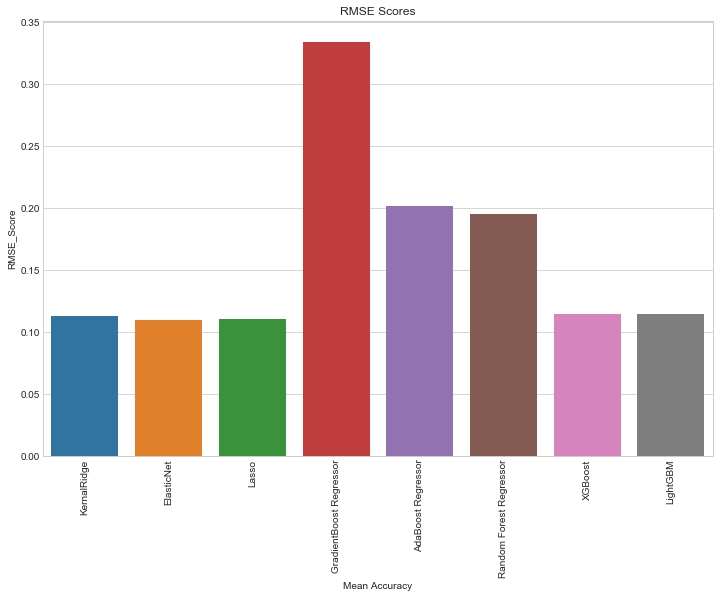

In [23]:
# Plot to check which algorithms did better
plt.figure(figsize=(12, 8))
sns.barplot(x='Algorithms', y='RMSE_Score', data=cv_res_df)
plt.xticks(rotation=90)
plt.xlabel('Mean Accuracy')
plt.title('RMSE Scores')

We got some really good scores from some of the models, we can further improve these scores by using [`Bayesian Optimization`](https://github.com/fmfn/BayesianOptimizationhttps://github.com/fmfn/BayesianOptimization) to tune our hyper parameters more.

Also, we can further improve the score by using `Stacking` of models, `Stakcing` with a meta-learner and 2 layer stacks with 2 meta learners.